# My Job Applications 2023

***

## Imports & Stored Data

In [1]:
from py_files.data_functions import add_app, add_init_response, add_interview_info,\
    add_more_ints, add_final_response, concat_dfs, add_to_json, view_data

from py_files.visualization_functions import job_categories, initial_responses, \
    apps_timeline, explore_data, cat_ref_plt
from py_files.subplots import two_by_two

In [2]:
# data = view_data()
# data.head(3)

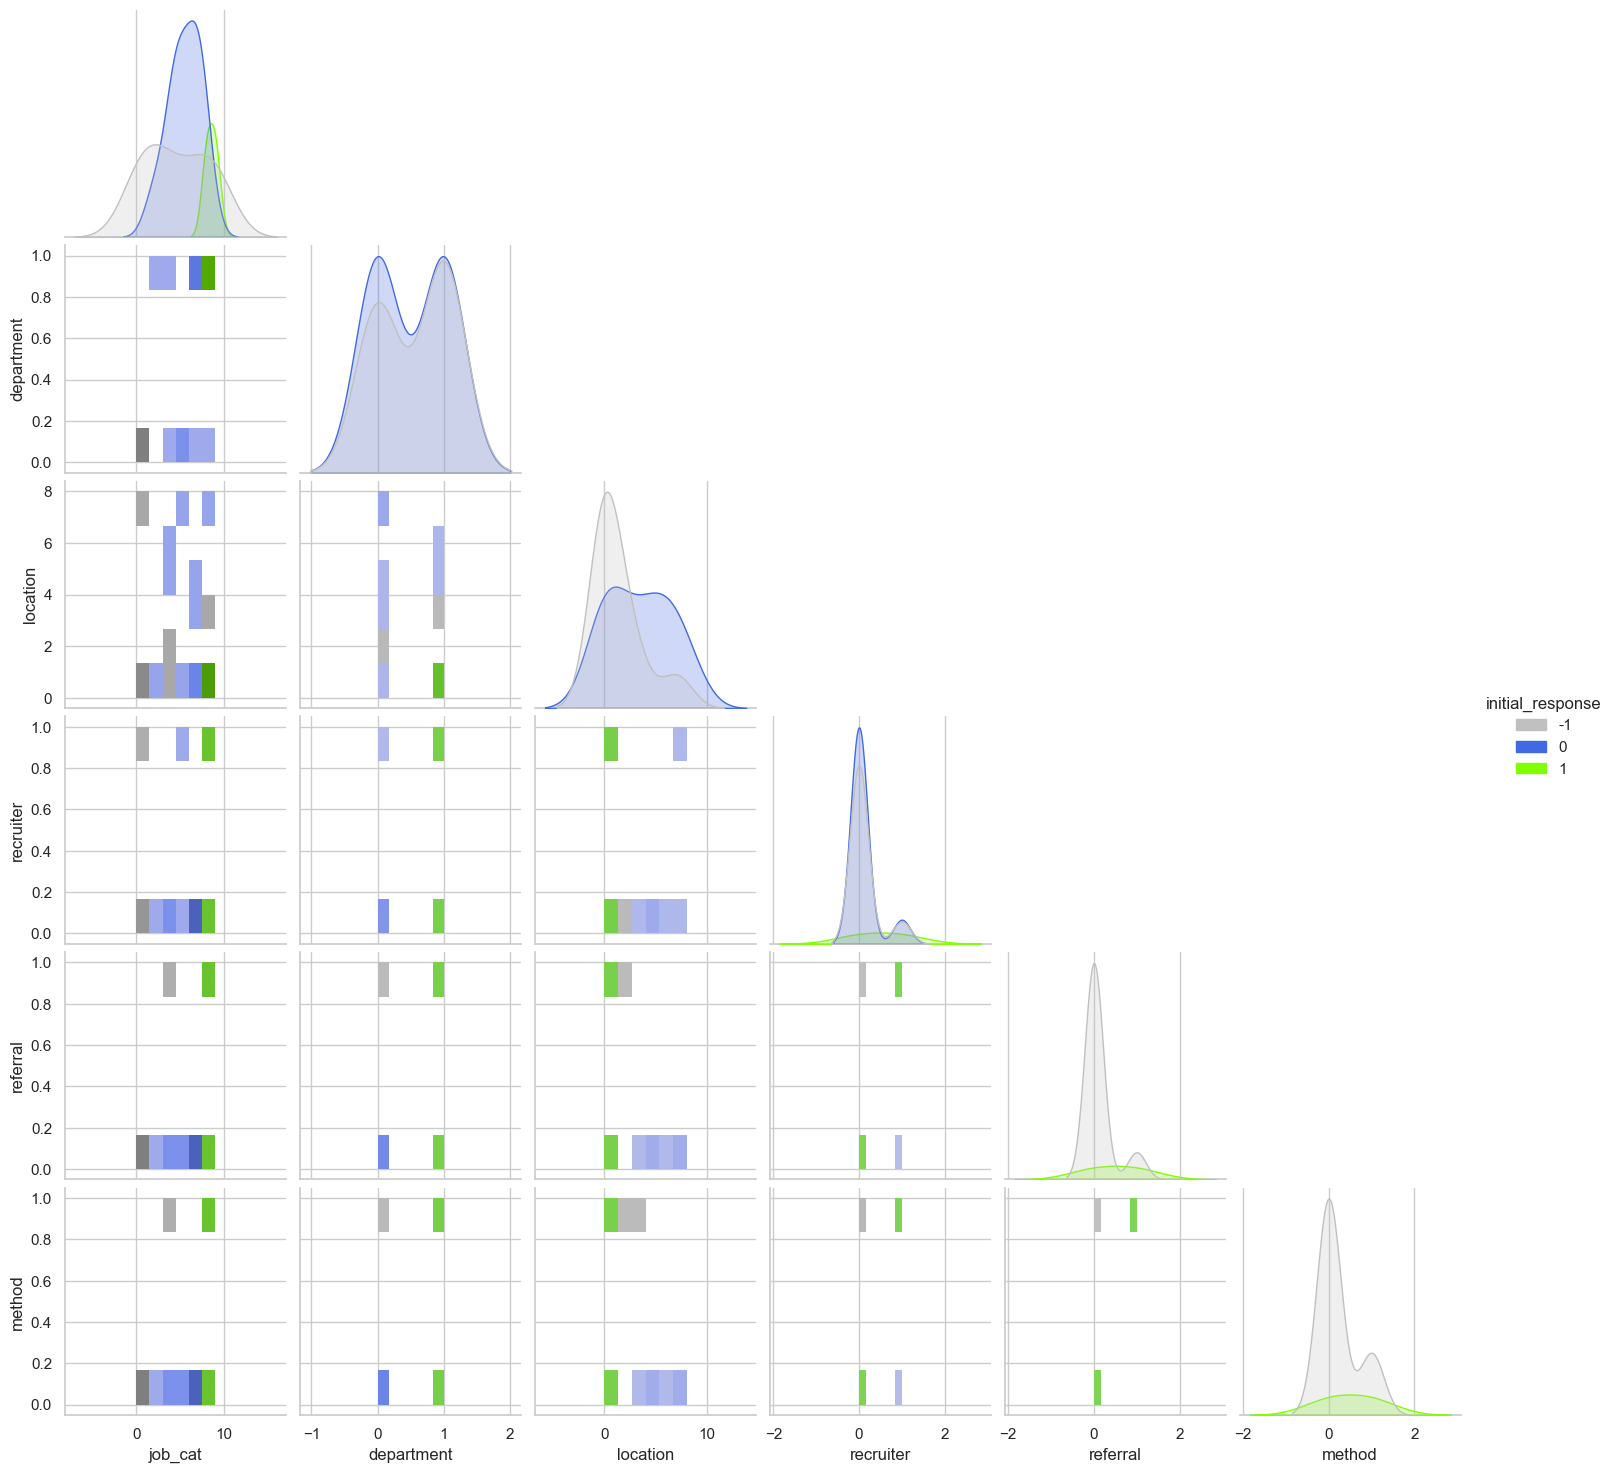

In [4]:
explore_data()

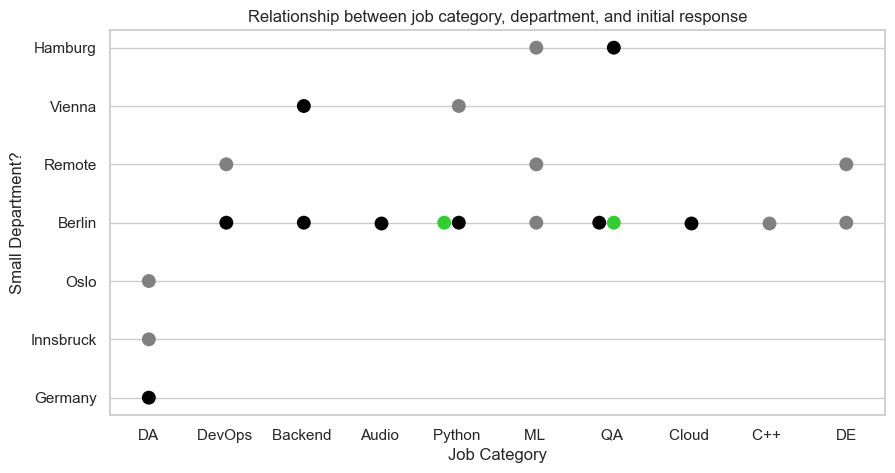

In [3]:
cat_ref_plt()

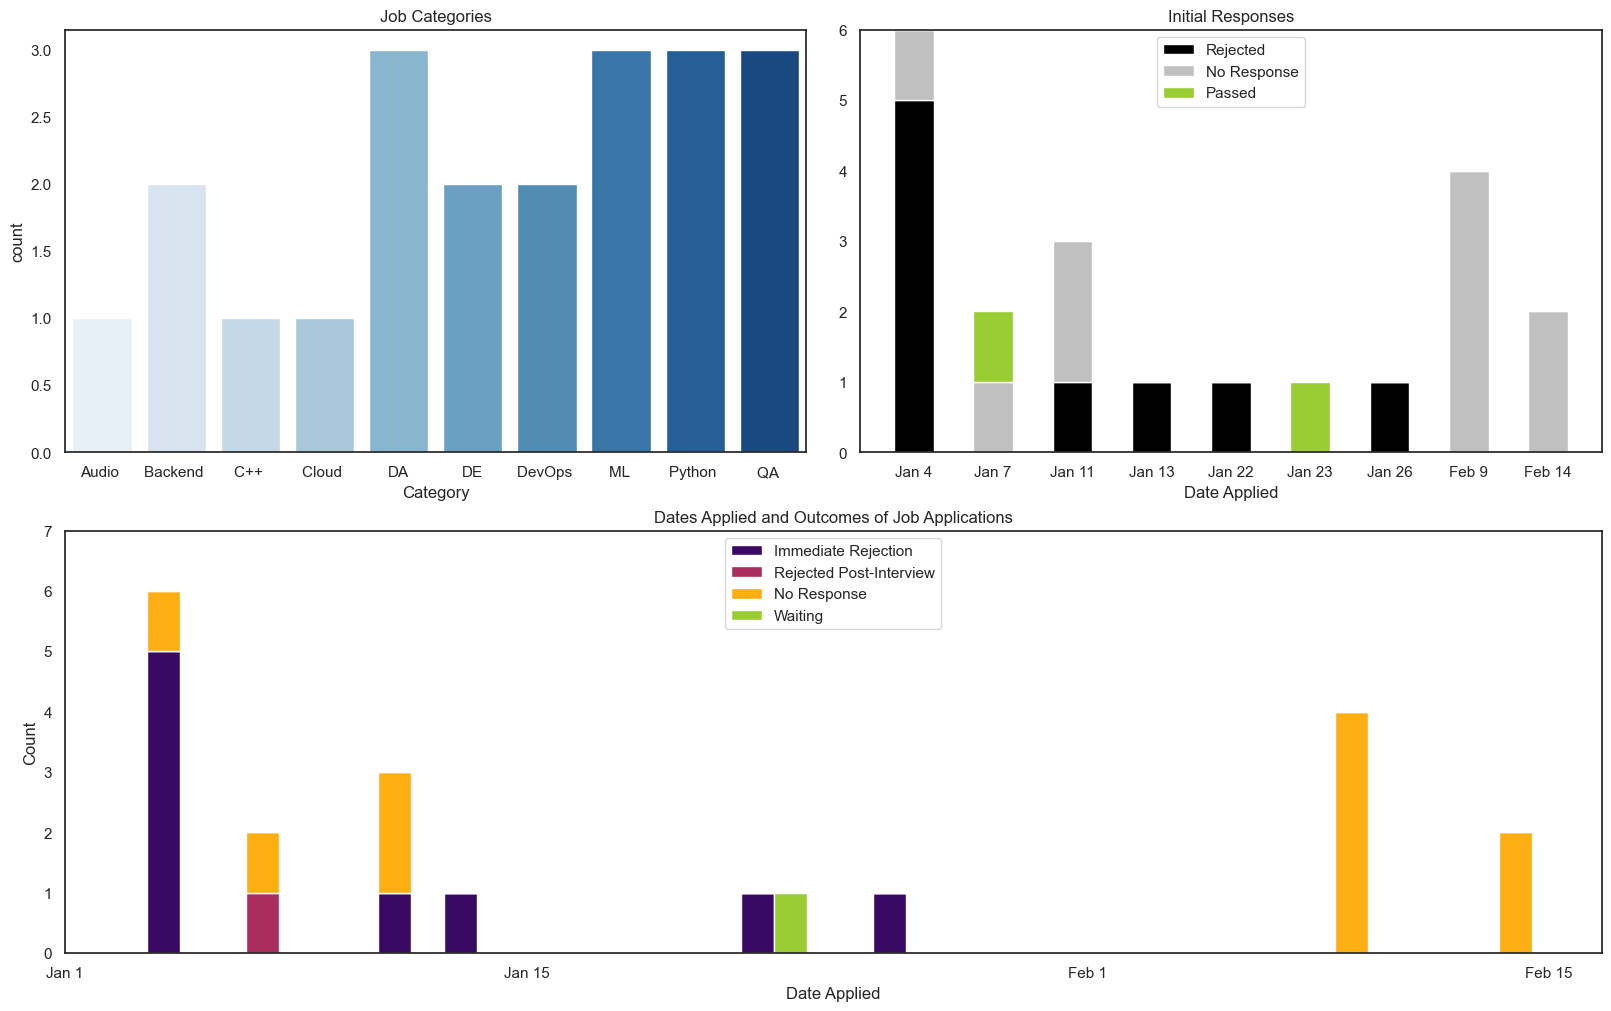

In [4]:
two_by_two()

## Visualizations

### Job Categories

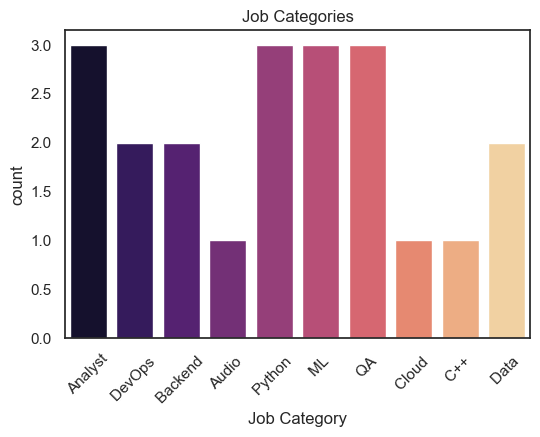

<AxesSubplot:title={'center':'Job Categories'}, xlabel='Job Category', ylabel='count'>

In [5]:
job_categories()

### Initial Responses by Date

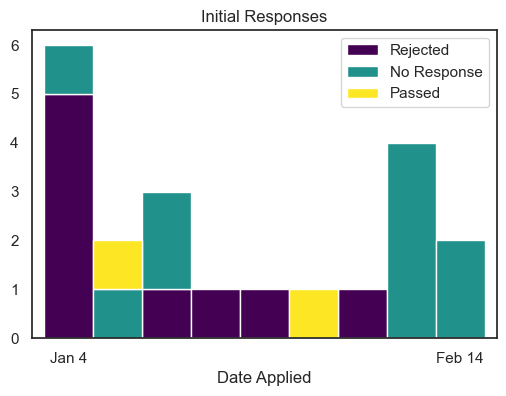

<AxesSubplot:title={'center':'Initial Responses'}, xlabel='Date Applied'>

In [6]:
initial_responses()

### Timeline of Job Applications and Outcomes

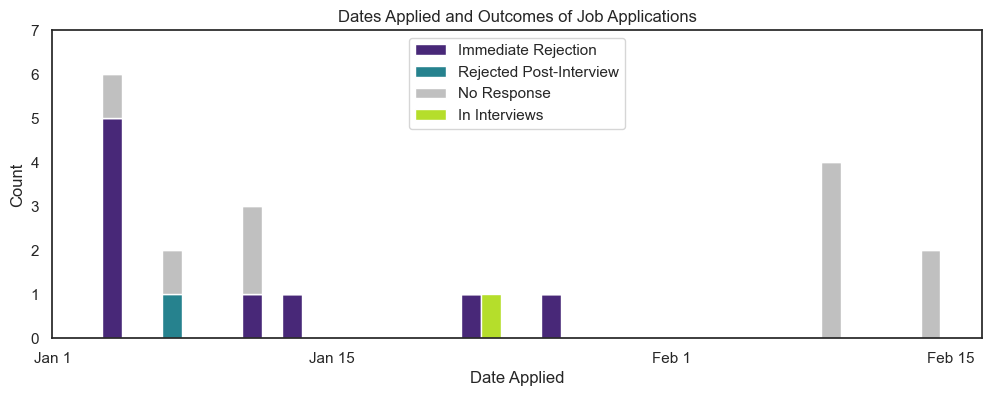

<BarContainer object of 9 artists>

In [7]:
apps_timeline()

## Input New Data

#### Imports

In [8]:
# import numpy as np
# import pandas as pd
# from datetime import datetime
# from collections import Counter
# from dateutil.relativedelta import relativedelta

### Apps

In [9]:
# app1 = add_app('company_name', 'date_applied', 'job_title',
            #    'job_cat', 'department', 'location', None,
            #    None, 'method', 'url')

### Responses

In [10]:
# fr_df1 = add_init_response('company_name', 'date_applied', 'Passed', 
#                   'date_init_resp', 'date_interview1', 'interviewers')
# fr_df2 = add_init_response('company_name', 'date_applied', 'Rejected', 'date_init_resp')

### Interview Info

In [11]:
# int_df1 = add_interview_info('company_name', 'date_applied', 'interview_notes', 'next_steps')

In [12]:
# m_int_df = add_more_ints('company_name', 'date_applied', 'next_interviews')

### Final Outcomes

In [13]:
# fo_df1 = add_final_response('company_name', 'date_applied', 'final_outcome', 'feedback')

### Optional Joining of Multiple Added DFs

In [14]:
# new_jobs_df = concat_dfs(old_jobs_df, [fr_df1, fo_df1, app1])

In [15]:
# new_jobs_df

## Write to JSON

In [16]:
# jobs_df = pd.read_json('job_data.json', orient='table')

In [17]:
# jobs_df = add_to_json(jobs_df)